### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Lecture 3: New Networks from Old

In many situations, simple graphs are preferred over directed graphs.
A simple method of turning a directed graph into a simple graph is
given by ignoring the directions of the arrows, i.e., by reading each
directed edge as an undirected edge.  Some information will get lost
on the way.  Other methods of producing a simple graph from a directed
one are based on composition of relations.  We will see that the same
method can be used to produce simple projections from bipartite
graphs.

### Product of Relations

Suppose that $A$ is the (square) matrix adjacency matrix of a (undirected) network, corresponding to a relation $R$.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.Graph()

In [4]:
G.add_edges_from([(1,2),(2,3),(2,4), (3,4)])

/opt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


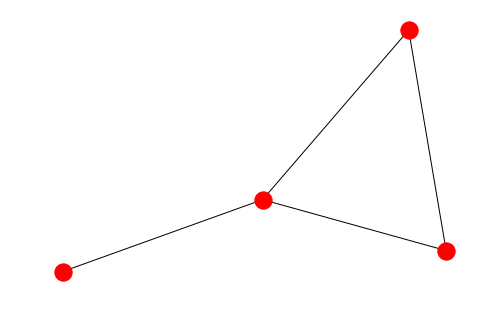

In [5]:
nx.draw(G)

In [8]:
A = nx.adjacency_matrix(G)

In [12]:
AA = A * A

In [13]:
print(AA.todense())

[[1 0 1 1]
 [0 3 1 1]
 [1 1 2 1]
 [1 1 1 2]]


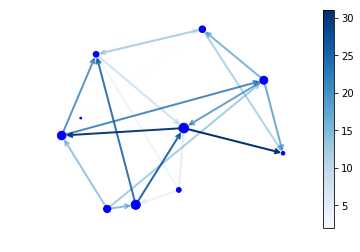

In [16]:
import matplotlib as mpl

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()


In [17]:
G = nx.generators.social.davis_southern_women_graph()

In [20]:
list(G.nodes)

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [24]:
pos = nx.spring_layout(G)

(-0.8935746318669432,
 1.0144360239670702,
 -1.14405027734187,
 1.1488343891508617)

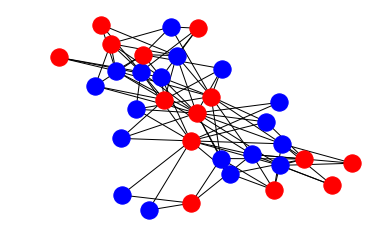

In [34]:
nx.draw_networkx_nodes(G, pos, nodelist = G.graph['top'], node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist = G.graph['bottom'], node_color = 'r')
nx.draw_networkx_edges(G, pos)
plt.axis('off')